# 1. 데이터 준비 및 Array 저장
데이터 다운로드 [링크](https://dacon.io/competitions/official/235838/data)

Keras로 기계학습을 하기 이전에 데이터를 불러오고 입력 형식에 맞도록 변환하는 과정을 거쳐야 합니다.

이 과정은 환경에 따라 시간이 오래 소요되지만, 변환된 데이터를 저장하는 것으로 시간을 단축시킬 수 있습니다.

### 1.1 데이터 로드 및 변환

데이터를 불러오고 기계학습에 알맞는 데이터 형태로 변환해줍니다.

위 링크에서 데이터를 다운로드 받아 한 디렉터리에 저장해주세요.

여기에서는 디렉터리 이름을 **dataset** 으로 했습니다.

In [ ]:
import numpy as np      # version: 1.19.5
import pandas as pd     # version: 1.3.4
from PIL import Image   # version: 8.4

In [ ]:
# 데이터세트 디렉터리 지정
train_dataset_dir = "dataset/train/"
test_dataset_dir = "dataset/test/"

# csv 파일 로드
train_dataset_csv = pd.read_csv(train_dataset_dir + "train_data.csv")
test_dataset_csv = pd.read_csv(test_dataset_dir + "test_data.csv")

In [ ]:
# 학습 데이터세트와 데이터 라벨 저장
dataset = []
dataset_label = []

# 학습 데이터세트에서 이미지를 불러와 Array 형태로 저장합니다.
for file in train_dataset_csv['filen_name']:
    image_array = np.array(Image.open(train_dataset_dir + file))
    dataset.append(image_array)
    
# 학습 데이터 라벨을 저장합니다.
for label in train_dataset_csv['label']:
    dataset_label.append(label)

In [ ]:
# 학습 데이터세트를 List에서 Array 형식으로 변환합니다.
dataset = np.array(dataset)
dataset_label = np.array(dataset_label)

# 학습 데이터세트의 크기를 변환합니다.
dataset = dataset/255.
dataset = dataset.reshape(-1, dataset.shape[1], dataset.shape[2], 1)

In [ ]:
# 테스트 데이터세트도 동일한 과정을 거칩니다.
test_dataset = []
for test_file in test_dataset_csv['file_name']:
    image_array = np.array(Image.open(test_dataset_dir + test_file))
    test_dataset.append(image_array)
    
test_dataset = np.array(test_dataset)

In [ ]:
# 테스트 데이터 크기 변환
test_dataset = test_dataset/255.
test_datset = test_dataset.reshape(-1, test_dataset.shape[1], test_dataset.shape[2], 1)

### 1.2 학습/검증 데이터세트 구분

기계학습에서 사용할 학습 데이터세트와 검증 데이터세트를 나누어줍니다.

기계학습 과정에서 검증 데이터를 사용하면 과적합(Overfitting) 현상을 방지할 수 있습니다.

In [ ]:
from sklearn.model_selection import train_test_split    # version: 1.0.1

# 학습 데이터, 검증 데이터, 학습 라벨, 검증 라벨 구분
train_dataset, validation_dataset, train_dataset_label, validation_dataset_label = train_test_split(dataset, dataset_label, test_size = 0.2, stratify = dataset_label)

In [ ]:
print("Train Dataset Shape: ", train_dataset.shape)                         # (4000, 28, 28, 1)
print("Train Dataset Label Shape: ", train_dataset_label.shape)             # (4000, ) 
print("Validation Dataset Shape: ", validation_dataset.shape)               # (1000, 28, 28, 1)
print("Validation Dataset Label Shape: ", validation_dataset_label.shape)   # (1000, )
print("Test Dataset Shape: ", test_dataset.shape)                           # (5000, 28, 28, 1)

### 1.3 Array 저장

모든 데이터세트가 준비 되면, 넘파이를 이용해 Array를 저장합니다.

터미널이 초기화될 때마나다 이미지 변환 과정을 거치면 시간이 많이 낭비됩니다.

Array를 필요할 때마다 사용할 수 있도록 변환해서 시간을 아낍시다!

In [ ]:
# Array를 저장할 디렉터리
dataset_dir = "./dataset/"

# 모든 데이터세트 저장
np.save(dataset_dir + "train_dataset.npy", train_dataset)
np.save(dataset_dir + "train_dataset_label.npy", train_dataset_label)

np.save(dataset_dir + "validation_dataset.npy", validation_dataset)
np.save(dataset_dir + "validation_dataset_label.npy", validation_dataset_label)

np.save(dataset_dir + "test_dataset.npy", test_dataset)

### 1.4 Array 불러오기 및 테스트

Array가 잘 저장이 되었는지 불러와서 테스트 해봅니다.

In [ ]:
# Array 불러오기
dataset_loadtest = np.load(dataset_dir + "train_dataset.npy")

In [ ]:
# Array가 잘 불러왔는지 이미지로 확인합니다.
import matplotlib.pyplot as plt     # version: 3.4.3

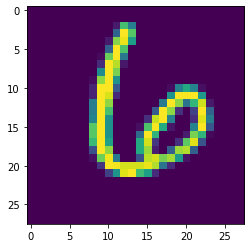

In [ ]:
# 첫 번째 이미지를 불러와봅니다.
plt.imshow(dataset_loadtest[0])

데이터가 잘 저장되는 것을 확인할 수 있습니다!